In [1]:
import fitsio as fio
import redmapper
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sns.set_theme()
sns.set_style("dark")
sns.set_style("ticks")
sns.set(rc = {'figure.figsize':(15,8)})

/global/homes/z/zchusre/.conda/envs/desdesi/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',


Andres: 
Though to summarize it's: OmegaM=0.314, sigma8 = 0.84, H0=67.3

From Abacus Cosmos Site


$\begin{equation}
\begin{array}{|l|l|}
\hline \text { Parameter } & \text { Value } \\
\hline \text { ombh^2 } & 0.02222 \\
\hline \text { omcdmh^2 } & 0.1199 \\
\hline \text { omh^2 } & 0.14212 \\
\hline \text { w0 } & -1.0 \\
\hline \text { ns } & 0.9652 \\
\hline \text { sigma_8 } & 0.830 \\
\hline \text { H0 } & 67.26 \\
\hline \text { N_eff } & 3.04 \\
\hline \text { massless_neutrinos } & 3.04 \\
\hline \text { omnuh2 } & 0.0 \\
\hline
\end{array}
\end{equation}$

In [2]:
from colossus.cosmology import cosmology
h = 0.6726
params = {'flat' : True, 'H0' : 67.26,  'Om0' : 0.14212/h**2, 'Ob0' : 0.02222/h**2, 'sigma8' : 0.81, 'ns' : 9.9652, 'w0' : -1.0, 'Neff' : 3.04}
cosmo = cosmology.setCosmology('Abacus',params)
print(cosmo)

Cosmology "Abacus" 
    flat = True, Om0 = 0.3142, Ode0 = 0.6858, Ob0 = 0.0491, H0 = 67.26, sigma8 = 0.8100, ns = 9.9652
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0400, powerlaw = False


In [3]:
from astropy import units as u
M_sun = u.Msun

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# from tqdm.notebook import trange, tqdm
from tqdm import tqdm
tqdm.pandas()

In [5]:
# halo catalog
import h5py
import numpy as np
halo_fname = '/global/cfs/cdirs/des/zhou/spt_lensing/abacus/RShalos_allprops.hdf5'
f = h5py.File(halo_fname,'r')

In [6]:
list(f.keys())

['halos']

In [7]:
halos = f['halos']
print(halos.dtype)
m500c = halos['alt_m_SO'][:,2]
m200b = halos['alt_m_SO'][:,0]
pos_x = halos['pos'][:,0]
pos_y = halos['pos'][:,1]
pos_z = halos['pos'][:,2]
halo_id = halos['id']
parent_id = halos['parent_id']
number = len(m500c)
z = 0.3
z_column = z*np.ones(number)

[('id', '<i8'), ('parent_id', '<i8'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('corevel', '<f4', (3,)), ('bulkvel', '<f4', (3,)), ('m', '<f4'), ('m_SO', '<f4'), ('r', '<f4'), ('child_r', '<f4'), ('vmax_r', '<f4'), ('mgrav', '<f4'), ('vmax', '<f4'), ('rvmax', '<f4'), ('rs', '<f4'), ('klypin_rs', '<f4'), ('vrms', '<f4'), ('J', '<f4', (3,)), ('energy', '<f4'), ('spin', '<f4'), ('alt_m', '<f4', (4,)), ('alt_m_SO', '<f4', (4,)), ('Xoff', '<f4'), ('Voff', '<f4'), ('b_to_a', '<f4'), ('c_to_a', '<f4'), ('A', '<f4', (3,)), ('b_to_a2', '<f4'), ('c_to_a2', '<f4'), ('A2', '<f4', (3,)), ('bullock_spin', '<f4'), ('kin_to_pot', '<f4'), ('m_pe_b', '<f4'), ('m_pe_d', '<f4'), ('halfmass_radius', '<f4'), ('num_p', '<i8'), ('num_child_particles', '<i8'), ('p_start', '<i8'), ('desc', '<i8'), ('flags', '<i8'), ('n_core', '<i8'), ('subsamp_start', '<i8'), ('subsamp_len', '<i8'), ('min_pos_err', '<f4'), ('min_vel_err', '<f4'), ('min_bulkvel_err', '<f4'), ('N', '<i4'), ('alt_N', '<i4', (4,)), ('N_SO', '<i4

In [8]:
print(type(halos['id']))

<class 'numpy.ndarray'>


In [9]:
print("Zero mass ratio:",np.sum(m500c == 0 )/number)

Zero mass ratio: 0.0765981293433836


In [10]:
print(halos.dtype)
print(halos.shape)

[('id', '<i8'), ('parent_id', '<i8'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('corevel', '<f4', (3,)), ('bulkvel', '<f4', (3,)), ('m', '<f4'), ('m_SO', '<f4'), ('r', '<f4'), ('child_r', '<f4'), ('vmax_r', '<f4'), ('mgrav', '<f4'), ('vmax', '<f4'), ('rvmax', '<f4'), ('rs', '<f4'), ('klypin_rs', '<f4'), ('vrms', '<f4'), ('J', '<f4', (3,)), ('energy', '<f4'), ('spin', '<f4'), ('alt_m', '<f4', (4,)), ('alt_m_SO', '<f4', (4,)), ('Xoff', '<f4'), ('Voff', '<f4'), ('b_to_a', '<f4'), ('c_to_a', '<f4'), ('A', '<f4', (3,)), ('b_to_a2', '<f4'), ('c_to_a2', '<f4'), ('A2', '<f4', (3,)), ('bullock_spin', '<f4'), ('kin_to_pot', '<f4'), ('m_pe_b', '<f4'), ('m_pe_d', '<f4'), ('halfmass_radius', '<f4'), ('num_p', '<i8'), ('num_child_particles', '<i8'), ('p_start', '<i8'), ('desc', '<i8'), ('flags', '<i8'), ('n_core', '<i8'), ('subsamp_start', '<i8'), ('subsamp_len', '<i8'), ('min_pos_err', '<f4'), ('min_vel_err', '<f4'), ('min_bulkvel_err', '<f4'), ('N', '<i4'), ('alt_N', '<i4', (4,)), ('N_SO', '<i4

In [11]:
column_names = ["id","parent_id","M500c","M200b","z","pos_x","pos_y","pos_z"]
halo_df = pd.DataFrame(data=dict(zip(column_names,(halo_id,parent_id,m500c,m200b,z_column,pos_x,pos_y,pos_z))))

S.Grandis:

 i’ll put the description of SPT selection painting here:
— you start with a halo with Mass M and redshift z, and compute the expected intrinsic signal 2 noise $\zeta$ following https://arxiv.org/pdf/1812.01679.pdf eq. 1. The values of of (A,B,C)_SZ can be found in table 3 (use the nuCDM SPT CL table)
— once you have $<\ln \zeta>$, draw $\ln \zeta$ ~ $\mathcal{N}$($<\ln \zeta>$, $\sigma_{SZ}^2$), you can find the values of $\sigma_{SZ}$ in the same table
— the measured signal to noise $\xi$ is a biased noisy version of the intrinsic signal to noise, $\xi$ ~ $\mathcal{N}$($\sqrt{ \gamma_f^2 \zeta^2 +3}, 1 )$, for $\gamma_f$ — the field depth — lets start with the value of 1.2
— the SPT selection is a hard cut $\xi > 4.5$

operationally for each halo, you got $(M,z)$ --> $<\ln \zeta>$ --> $\zeta$ --> $\xi$ --> select

In [12]:
# Not sure why there are zero mass  
halo_df.drop(halo_df[halo_df['M500c'] == 0].index, inplace=True)

# Assign $<\ln \zeta>$

$\langle\ln \zeta\rangle= \ln A_{\mathrm{SZ}}+B_{\mathrm{SZ}} \ln \left(\frac{M_{500 c} h_{70}}{4.3 \times 10^{14} M_{\odot}}\right) +C_{\mathrm{SZ}} \ln \left(\frac{E(z)}{E(0.6)}\right)$

In [13]:
h_70 = cosmo.H0/70
A_SZ = 5.24
B_SZ = 1.534
C_SZ = 0.465
sigma_SZ = 0.161
gamma_f = 1.2
SPT_xi_cut = 4.5

In [14]:
def get_log_zeta(A_SZ_,B_SZ_,C_SZ_,M,z):
    log_zeta = np.log(A_SZ_) + B_SZ_*np.log((M*h_70)/(4.3E14*M_sun)) + C_SZ_*np.log(cosmo.Ez(z)/cosmo.Ez(0.6))
    return log_zeta

In [15]:
h_70

0.960857142857143

In [16]:
halo_df['mean_ln_zeta']=get_log_zeta(A_SZ,B_SZ,C_SZ,halo_df['M500c'],halo_df['z'])

In [17]:
halo_df

,id,parent_id,M500c,M200b,z,pos_x,pos_y,pos_z,mean_ln_zeta
0,7399437,-1,2.136954e+12,4.040785e+12,0.3,1004.090820,572.540466,241.887192,-6.625653
1,7399438,7399443,3.108296e+12,3.108296e+12,0.3,1005.440247,572.759277,242.100357,-6.050873
2,7399439,7399444,3.302565e+12,6.177739e+12,0.3,1005.746033,572.327332,242.156296,-5.957875
3,7399440,-1,1.554148e+11,1.359880e+12,0.3,1005.678040,573.220032,241.481995,-10.646326
4,7399441,-1,5.828056e+11,1.126757e+12,0.3,1003.740295,570.652588,244.413971,-8.618753
...,...,...,...,...,...,...,...,...,...
9859099,2471660,-1,3.885371e+10,7.382204e+11,0.3,30.948286,33.415543,551.565369,-12.772902
9859100,2471661,-1,1.554148e+11,7.770741e+11,0.3,20.744936,10.523636,571.963135,-10.646326
9859102,2471663,-1,1.554148e+11,5.050982e+11,0.3,7.353600,32.219143,571.895142,-10.646326
9859103,2471664,-1,3.885371e+10,7.770741e+11,0.3,8.544400,25.757885,563.339783,-12.772902


# Draw $\zeta$ from $\mathcal{N}$($<\ln \zeta>, \sigma_{SZ})$

In [18]:
np.random.seed(0)

In [19]:
halo_df['zeta'] = halo_df.progress_apply(lambda x:np.exp(np.random.normal(x['mean_ln_zeta'],sigma_SZ)),axis=1)


100%|██████████| 9103916/9103916 [03:34<00:00, 42488.47it/s]


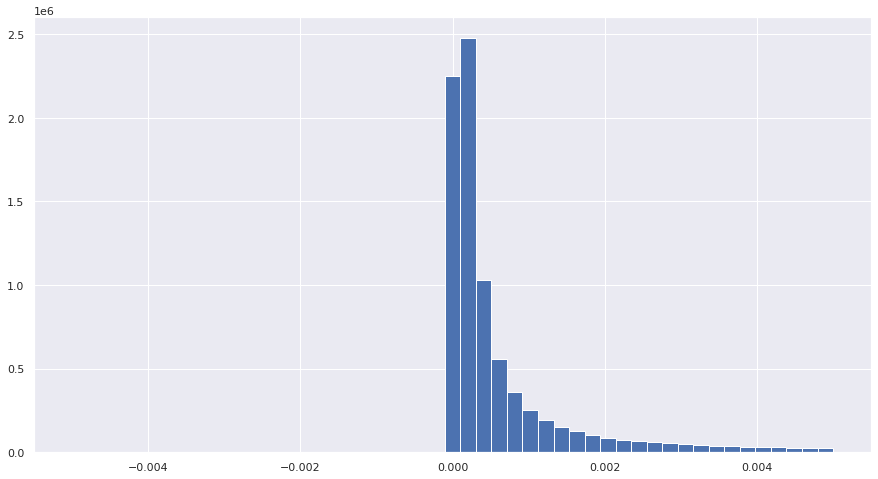

In [20]:
halo_df['zeta'].hist(bins=np.linspace(-0.005,0.005))

[Text(0.5, 1.0, 'Histogram of $\\zeta$')]

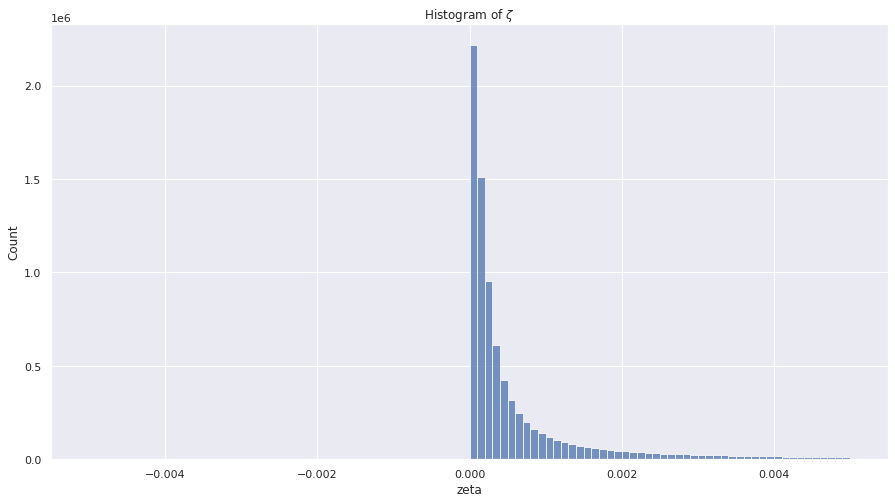

In [21]:
# bins_ = np.linspace(-3,7,1000)
zeta_hist = sns.histplot(halo_df['zeta'],bins=100,binrange=(-0.005,0.005))
zeta_hist.set(title=r"Histogram of $\zeta$")

# Draw $\xi$ from $\mathcal{N}$($\sqrt{ \gamma_f^2 \zeta^2 +3}, 1 )$

In [22]:
halo_df['xi'] = halo_df.progress_apply(lambda x:np.random.normal(np.sqrt(gamma_f**2*x['zeta']**2+3),1),axis=1)

100%|██████████| 9103916/9103916 [04:21<00:00, 34779.26it/s]


In [23]:
halo_df['xi'].describe()

count    9.103916e+06
mean     1.733537e+00
std      1.001328e+00
min     -3.439779e+00
25%      1.058763e+00
50%      1.733097e+00
75%      2.407425e+00
max      3.260969e+01
Name: xi, dtype: float64

[Text(0.5, 1.0, 'Histogram of $\\xi$')]

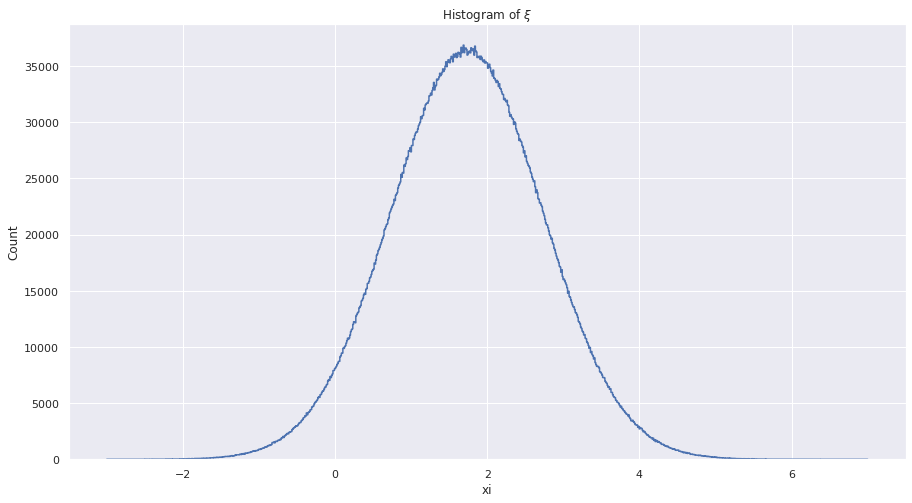

In [24]:
bins_ = np.linspace(-3,7,1000)
xi_hist = sns.histplot(halo_df['xi'],bins=bins_,binrange=(-3,7),element="step", fill=False)
xi_hist.set(title=r"Histogram of $\xi$")

# Make SPT selection


In [99]:
halo_df['xi_gt_45'] = halo_df.progress_apply(lambda x : 1 if x['xi']>=4.5 else 0,axis=1)
halo_df['xi_gt_5'] = halo_df.progress_apply(lambda x : 1 if x['xi']>=5 else 0,axis=1)
halo_df['zeta_gt_2'] = halo_df.progress_apply(lambda x : 1 if x['zeta']>=2 else 0,axis=1)
halo_df['select'] = halo_df['xi_gt_45'] & halo_df['zeta_gt_2']

100%|██████████| 9103916/9103916 [02:09<00:00, 70323.98it/s]


# Save

In [179]:
halo_file = "/global/cfs/cdirs/des/zhou/spt_lensing/data/halos_spt.pkl"
halo_df.to_pickle(halo_file)

# QA

In [101]:
sel_mask = (halo_df['xi_gt_5']==1) & (halo_df['zeta_gt_2'])
sel_no = np.sum(sel_mask)
print("The number of halos that passes SPT selection is:", sel_no)

The number of halos that passes SPT selection is: 460


The number of clusters in the SPT cosmology paper is 343

In [102]:
print("The equivalent number in SPT footprint is",5027*(2500/(41253)))

The equivalent number in SPT footprint is 304.644510702252


In [103]:
sel_mask

0          False
1          False
2          False
3          False
4          False
           ...  
9859099    False
9859100    False
9859102    False
9859103    False
9859104    False
Length: 9103916, dtype: bool

In [104]:
halo_df_sel = halo_df[sel_mask]

In [162]:
halo_df_sample = halo_df.sample(frac=1)

In [110]:
from matplotlib.lines import Line2D

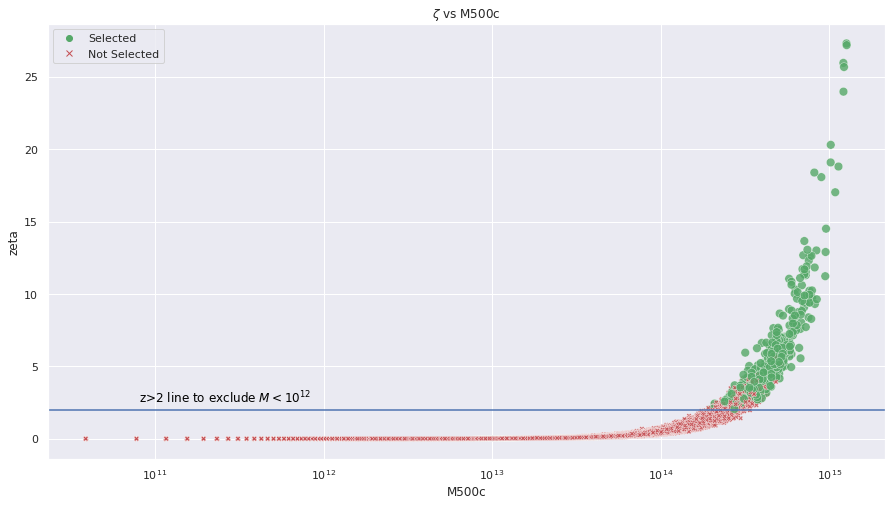

In [164]:
markers = {1: "o", 0: "X"}
plot1 = sns.scatterplot(x='M500c',y='zeta',data=halo_df,size="select",sizes=(75,25),alpha=0.8,hue="select",palette=["r","g"],style="select",markers=markers,legend=False)

plot1.set(xscale="log",yscale="linear",title="$\zeta$ vs M500c")
custom = [Line2D([], [], marker='o', color='g', linestyle='None'),
          Line2D([], [], marker='x', color='r', linestyle='None')]

plot1.axhline(2)
plt.legend(custom, ['Selected', 'Not Selected'], loc='upper left')
plt.text(0.8*1E11,2.5, "z>2 line to exclude $M < 10^{12}$", color='black')

plt.show()

In [150]:
import matplotlib as mpl
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=halo_df['zeta_gt_2'].min(),vmax=halo_df['zeta'].max())

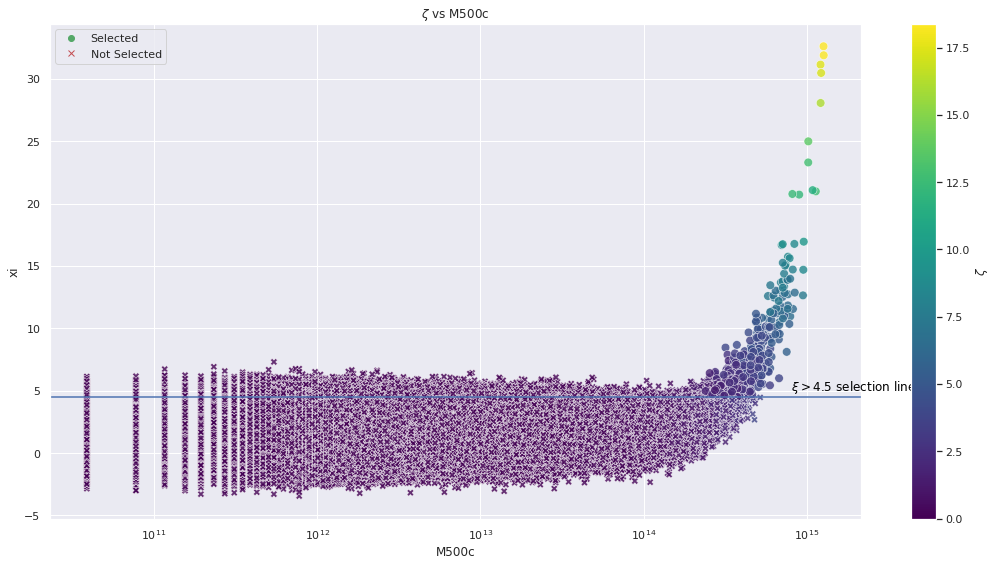

In [172]:
markers = {1: "o", 0: "X"}


plot1 = sns.scatterplot(x='M500c',y='xi',data=halo_df,hue="zeta",palette=cmap,norm=norm,size="select",sizes=(75,50),alpha=0.8,style="select",markers=markers,
                        legend=False)

plot1.set(xscale="log",yscale="linear",title="$\zeta$ vs M500c")
custom = [Line2D([], [], marker='o', color='g', linestyle='None'),
          Line2D([], [], marker='x', color='r', linestyle='None')]

plot1.axhline(4.5)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=cmap),label=r"$\zeta$")
plt.legend(custom, ['Selected', 'Not Selected'], loc='upper left')
plt.text(0.8*1E15,5, r"$\xi>4.5$ selection", color='black')
plt.tight_layout(pad=1)
plt.show()

In [169]:
norm_mass = mpl.colors.Normalize(vmin=halo_df['M500c'].min(),vmax=halo_df['M500c'].max())

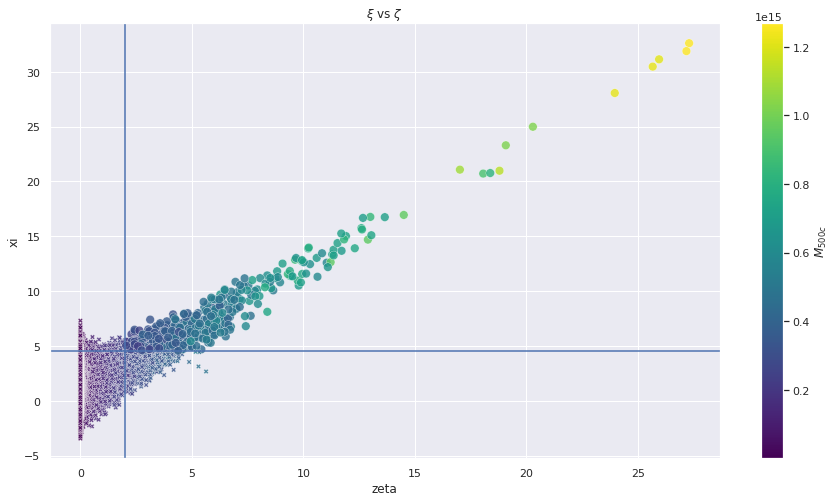

In [174]:
plot1 = sns.scatterplot(x='zeta',y='xi',data=halo_df,hue="M500c",palette=cmap,norm=norm_mass,
                        size="select",sizes=(75,25),alpha=0.8,style="select",markers=markers,legend=False)
plot1.set(xscale="linear",yscale="linear", title=r"$\xi$ vs $\zeta$")
plt.colorbar(mpl.cm.ScalarMappable(norm=norm_mass,cmap=cmap),label=r"$M_{500c}$")
plot1.axhline(4.5)
plot1.axvline(2)

In [201]:
halo_df['M500c'].describe()

count    9.103916e+06
mean     2.749560e+12
std      9.783678e+12
min      3.885371e+10
25%      3.885371e+11
50%      7.770741e+11
75%      1.826124e+12
max      1.268496e+15
Name: M500c, dtype: float64

In [243]:
np.log10(halo_df['M500c'])

0          12.329795
1          12.492522
2          12.518851
3          11.191492
4          11.765524
             ...    
9859099    10.589433
9859100    11.191492
9859102    11.191492
9859103    10.589433
9859104    11.630825
Name: M500c, Length: 9103916, dtype: float32

In [248]:
m_bins=np.histogram_bin_edges(np.log10(halo_df['M500c']),50)
print(m_bins)

[10.589433  10.679709  10.769987  10.860264  10.9505415 11.040818
 11.131096  11.221373  11.311649  11.401927  11.492204  11.582481
 11.672758  11.763035  11.8533125 11.943589  12.033867  12.124144
 12.214421  12.304698  12.394975  12.485252  12.575529  12.665807
 12.7560835 12.846361  12.936638  13.026915  13.117192  13.207469
 13.297747  13.388023  13.4783    13.568578  13.6588545 13.749132
 13.839409  13.929687  14.019963  14.11024   14.200518  14.290794
 14.381072  14.471349  14.5616255 14.651903  14.74218   14.832458
 14.922734  15.013012  15.103289 ]


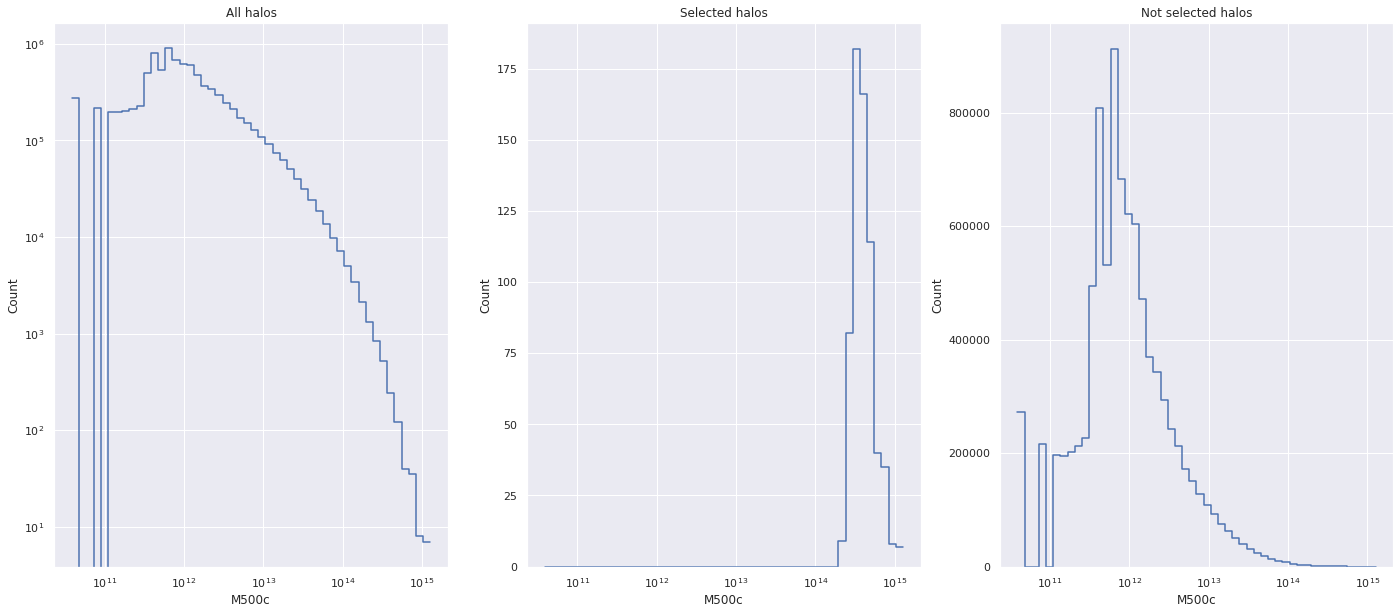

In [257]:
fig, axes=plt.subplots(ncols=3, figsize=[24,10])
sns.histplot(data=halo_df,x="M500c",stat="count",element="step",fill=False,ax=axes[0],bins=m_bins,
            log_scale=[True,True])
sns.histplot(data=halo_df[halo_df["select"]==1],x="M500c",stat="count",element="step",fill=False,
             bins=m_bins,ax=axes[1],
            log_scale=[True,False])
sns.histplot(data=halo_df[halo_df["select"]==0],x="M500c",stat="count",element="step",fill=False,
             bins=m_bins,ax=axes[2],
            log_scale=[True,False])

axes[0].set_title("All halos")
axes[1].set_title("Selected halos")
axes[2].set_title("Not selected halos")
fig.show()